In [1]:
%load_ext autoreload
%autoreload 2
%cd ..
%load_ext tensorboard

/Users/gimli/projects/igre


In [2]:
import imageio
import matplotlib.pyplot as plt
import cv2
import numpy as np
from src.registration.transformation import Transformation
import src.workers.affine as affine

In [3]:
# Input image(s)
vis_band_filename = "/Users/gimli/Pictures/2014-firenze-data/26-11-2014-provino-bianco/TIF.8bit_norm.255/Ch13_VIS_13_n_8b.tif"
nir_band_filename = "/Users/gimli/Pictures/2014-firenze-data/26-11-2014-provino-bianco/TIF.8bit_norm.255/Ch20_NIR_1230nm_d048_n_8b.tif"

vis = imageio.imread(vis_band_filename)
nir = imageio.imread(nir_band_filename)

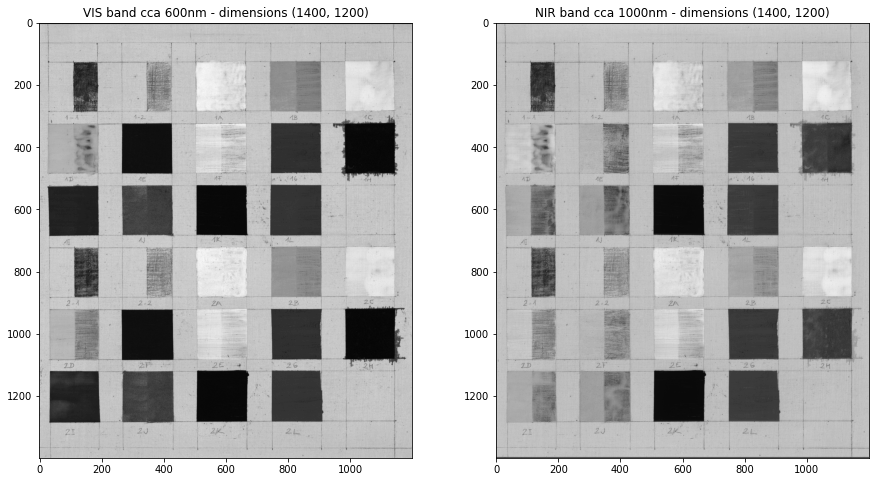

In [4]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
ax.imshow(vis, cmap="gray")
ax.set_title(f"VIS band cca 600nm - dimensions {vis.shape}")
ax = plt.subplot(1,2,2)
ax.imshow(nir, cmap="gray")
ax.set_title(f"NIR band cca 1000nm - dimensions {nir.shape}")
plt.show()

In [5]:
# Configuration of input transformation

shift = [25., 10.] # allowed range (=tested) [-50px, 50px]
rotation = 3. # allowed range is [-4°,4°]
scale = 1.05 # allowed range [0.9, 1.1]
T = Transformation.build(scale, rotation, shift)
print(T)

0.95x + 0.05y + -25.00	-0.05x + 0.95y + -10.00
--------------------	--------------------
0.00x + 0.00y + 1	0.00x + 0.00y + 1	


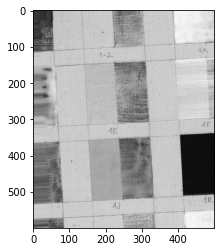

In [11]:
nir_t = Transformation.affine(nir[200:800,150:650], scale, rotation, shift)
plt.imshow(nir_t, cmap="gray")
plt.show()

Config integrity: OK
Building optimizer: {'family': 'adam', 'learning_rate': 0.002, 'beta1': 0.9, 'beta2': 0.8}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Selecting 25000 samples randomly for use by algorithm.



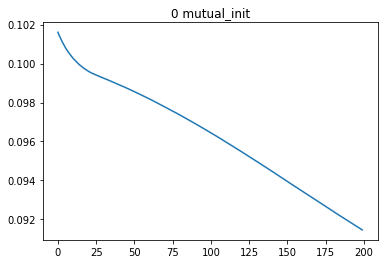

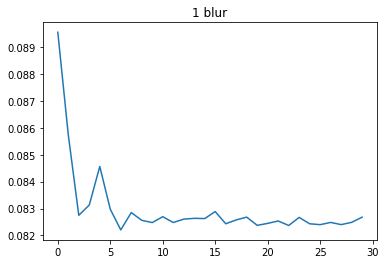

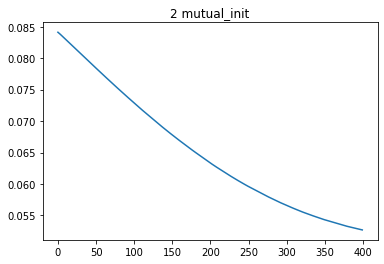

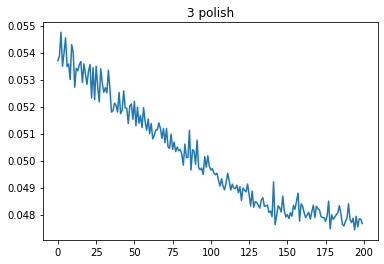

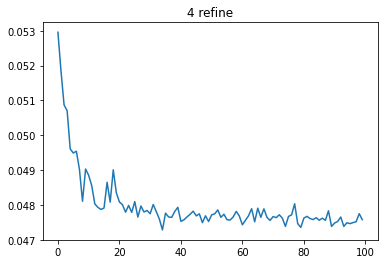

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
ShiftLayer (ShiftLayer)      (None, 2)                 2         
_________________________________________________________________
ScaleLayer (ScaleLayer)      (None, 2)                 2         
_________________________________________________________________
RotationLayer (RotationLayer (None, 2)                 1         
_________________________________________________________________
Idx2PixelLayer (Idx2PixelLay (None, 1)                 0         
_________________________________________________________________
Dense0 (Dense)               (None, 1)                 2         
_________________________________________________________________
Output (Dense)               (None, 1)                 2     

TypeError: Invalid shape (450, 400, 1) for image data

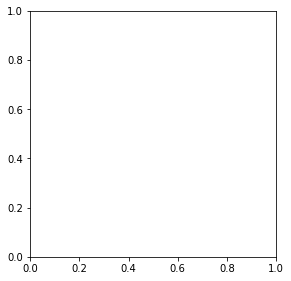

In [7]:
affine.find_tform(vis[200:800,150:650], nir_t)

In [10]:
imageio.imwrite("/Users/gimli/tmp/igre/imgs/vis.png", vis[350:800,200:600])